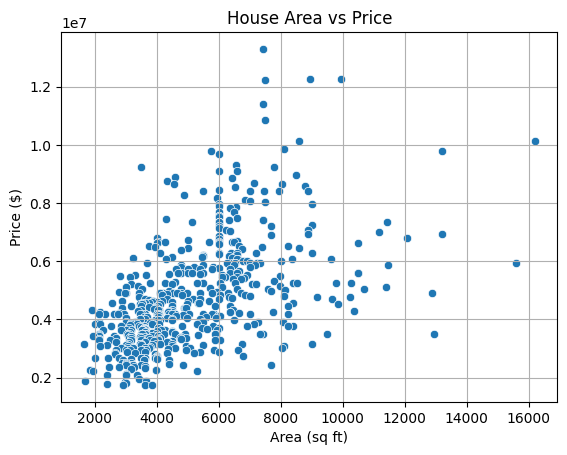

Manual Linear Regression: Slope = 461.9749, Intercept = 2387308.48
Scikit-learn Linear Regression: Slope = 425.7298, Intercept = 2512254.26
MAE: 1474748.13
MSE: 3675286604768.19
R^2 Score: 0.2729


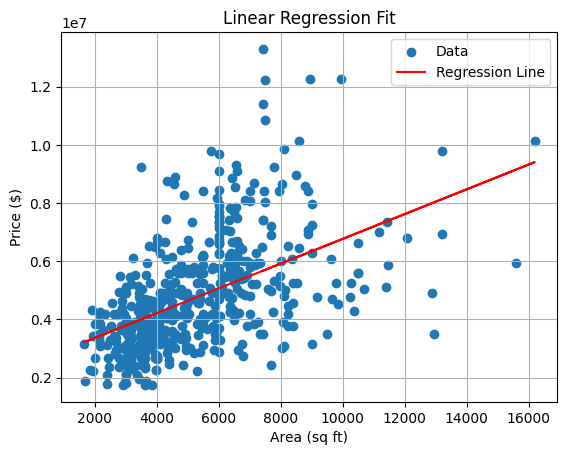

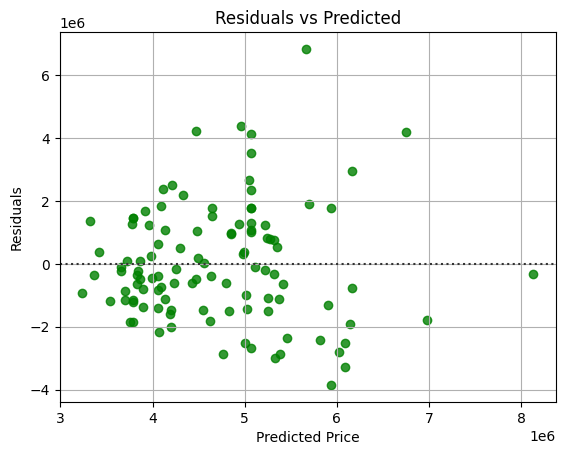

Predicted price for 1000 sq ft: $2937984.11


d:\hobby\MAAB\ai-roadmap\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# File: simple_linear_regression_housing.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r'D:\hobby\MAAB\ai-roadmap\content\ml\supervised\02 multiple linear regression\data\housing.csv')

# Check for missing values
assert not data.isnull().values.any(), "Dataset contains missing values. Please handle them first."

# Scatter plot: Area vs Price
sns.scatterplot(x='area', y='price', data=data)
plt.title("House Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

# Manual Linear Regression calculations
x = data['area'].values
y = data['price'].values

x_mean = np.mean(x)
y_mean = np.mean(y)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

print(f"Manual Linear Regression: Slope = {m:.4f}, Intercept = {b:.2f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data[['area']], data['price'], test_size=0.2, random_state=42)

# Model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Scikit-learn Linear Regression: Slope = {model.coef_[0]:.4f}, Intercept = {model.intercept_:.2f}")

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Regression line
plt.scatter(data['area'], data['price'], label='Data')
plt.plot(data['area'], model.predict(data[['area']]), color='red', label='Regression Line')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Linear Regression Fit")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color="g")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

# Predict price for 1000 sq ft
prediction_1000 = model.predict([[1000]])[0]
print(f"Predicted price for 1000 sq ft: ${prediction_1000:.2f}")
